# Airlines Passengers data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [5]:
data =pd.read_excel("D:/Forecasting/Airlines+Data.xlsx")

In [6]:
data.columns

Index(['Month', 'Passengers'], dtype='object')

In [7]:
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')

In [8]:
data = data.set_index('Month')

In [9]:
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


## Time Series Analysis



### Plot time series data

<AxesSubplot:xlabel='Month'>

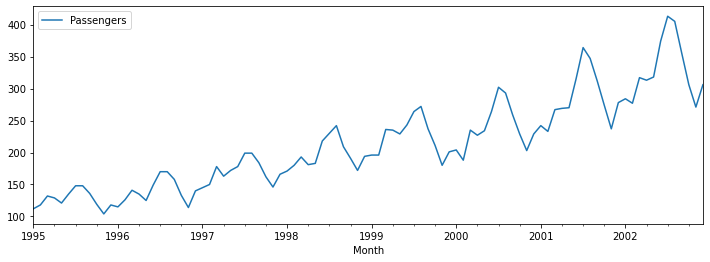

In [10]:
data.plot(figsize=(12,4))

## Handling missing values


### Mean inputation

<AxesSubplot:xlabel='Month'>

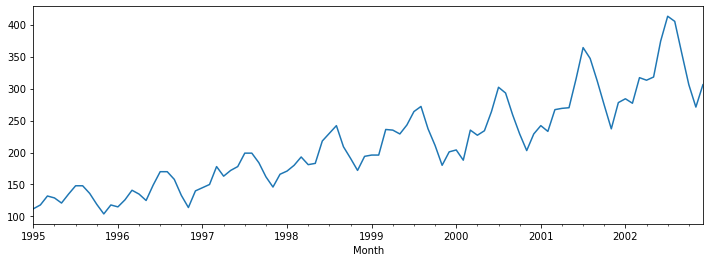

In [11]:
data = data.assign(Passengers_Mean_imputation = data['Passengers'].fillna(data['Passengers'].mean()))
data['Passengers_Mean_imputation'].plot(figsize=(12,4))


#### Problem:-
2002 takes higher values than expected.

1995 takes lower value than expected.

#### Linear interpolation


##### You draw a straight line joining the next and previous points of the missing values in the data.

In [12]:
data = data.assign(Passengers_Linear_Interpolation = data['Passengers'].interpolate(method='linear'))
data.head()


,Passengers,Passengers_Mean_imputation,Passengers_Linear_Interpolation
Month,,,
1995-01-01,112,112,112
1995-02-01,118,118,118
1995-03-01,132,132,132
1995-04-01,129,129,129
1995-05-01,121,121,121


<AxesSubplot:xlabel='Month'>

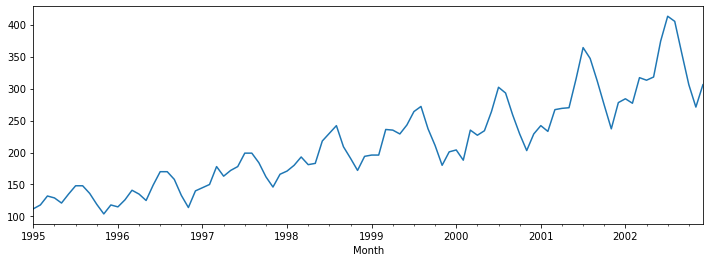

In [13]:
data['Passengers_Linear_Interpolation'].plot(figsize=(12,4))

We will go with the linear interpolation for imputing missing values.

## Outlier detection



### Box plot and interquartile range

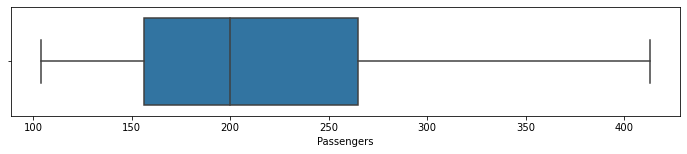

In [14]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(data['Passengers'], whis=1.5)


### *whis=1.5

1st quartile = 160

3rd quartile = 270

Quartile range = (3rd quartile - 1st quartile) = 270-160 = 110

### *Whisker on the upper side*

3rd quartile + (Quartile range * whis) = 270 + (160 * 1.5) = 270 + 240 = 510

There is no outliers above the whisker 510.

### *Whisker on th lower side*

1st quartile - (Quartile range * whis) = 160 - (160 * 1.5) = 160 - (240) = -80

There is no outliers on the negative side of the lower whisker.

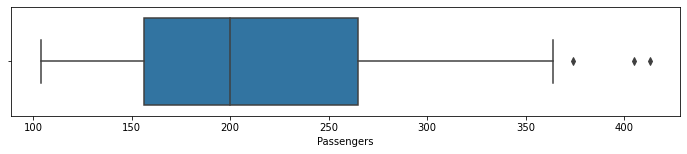

In [15]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(data['Passengers'], whis=1)


### whis = 1
1st quartile = 160

3rd quartile = 270

Quartile range = (3rd quartile - 1st quartile) = 270-160 = 110

### *Whisker on the upper side*

3rd quartile + (Quartile range * whis) = 270 + (160 * 1) = 270 + 160 = 430

There are 3 outliers above the whisker 430.

### Conclusion for selecting whis = 1.5

So from the above analysis of whis 1 and 1.5, we should select the whis = 1.5 quartile range. Because we don't want to miss any of the data in this time series analysis.

## Histogram plot

<AxesSubplot:>

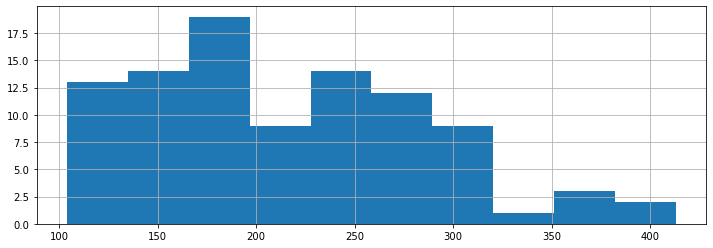

In [16]:
data['Passengers'].hist(figsize=(12,4))

### Doing the following

Dropping Passengers_Mean_imputation and Passengers columns.
Renaming Passengers_Linear_Interpolation column to Passengers column.
We will only work with the Linear interpolation imputation.



We will only work with the Linear interpolation imputation.

In [17]:
data.head()

,Passengers,Passengers_Mean_imputation,Passengers_Linear_Interpolation
Month,,,
1995-01-01,112,112,112
1995-02-01,118,118,118
1995-03-01,132,132,132
1995-04-01,129,129,129
1995-05-01,121,121,121


In [18]:
data = data.drop(['Passengers', 'Passengers_Mean_imputation'], axis=1)

In [20]:
data.rename(columns={'Passengers_Linear_Interpolation' : 'Passengers'}, inplace=True)

In [21]:
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


## Time series decomposition



#### Additive seasonal decomposition

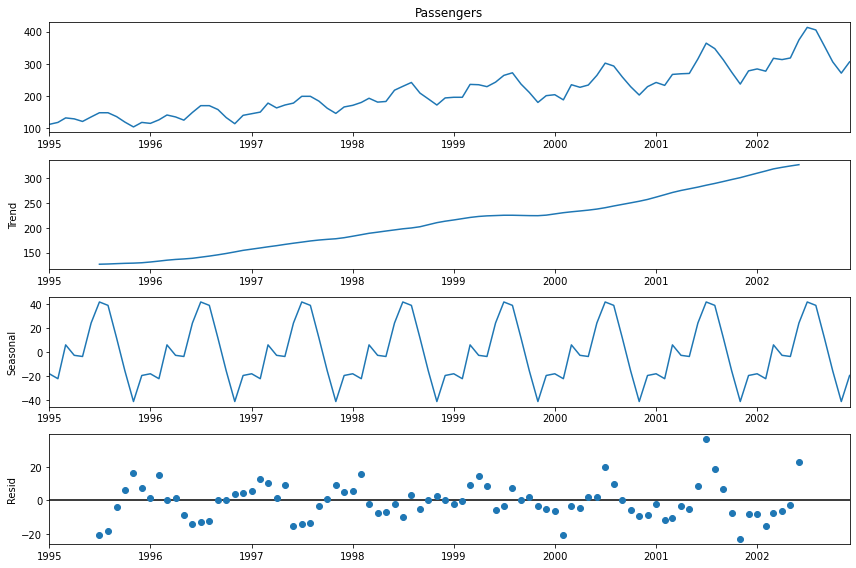

In [23]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data['Passengers'], model='additive')
fig = decomposition.plot()
plt.show()


#### Analysis:-

#### *Observed* - Actual data
#### *Trend* - 
Increasing or decreasing trend.

#### *Seasonal* -
Varies from +40 to -40 with the mean 0.
Each cycle represents each year trend.
The value in the Y-axis has to be added to the Trend plot value to get the actual value of that year. E.g.:- For the year 1996 , the seasonal value is +40 and the trend value is 100. Hence, teh actual value(passengers number) will (seasonal+Trend) value = 40+100 = 140.
#### *Residual* -  
It is the noise pattern of the time series data for each year, which was not captured by the two components - Trend and Seasonality. Residual is the left over after decomposition of the two major components (Trend and Seasonality)

## Multiplicative seasonal decomposition

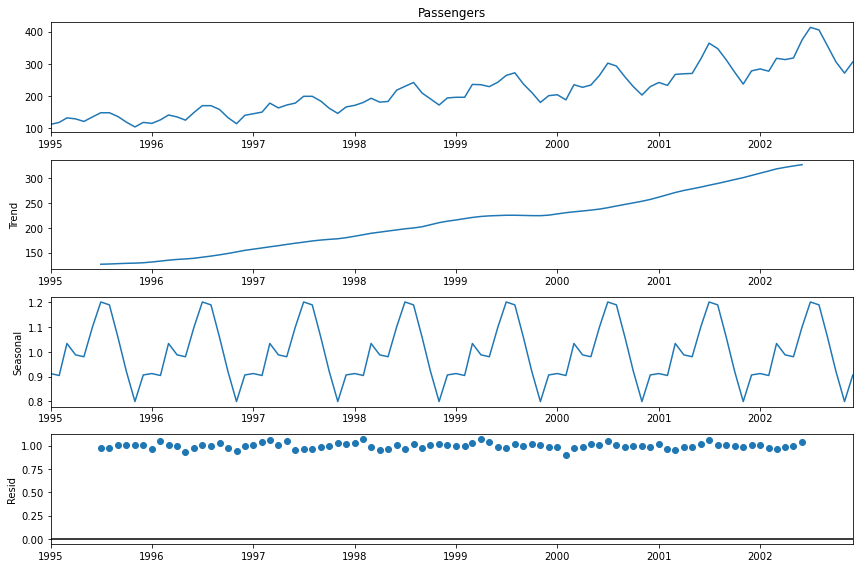

In [24]:
decomposition = sm.tsa.seasonal_decompose(data['Passengers'], model='multiplicative')
fig = decomposition.plot()
plt.show()


## Analysis:-
*Seasonal* -

Varies from 0.8 to 1.2
The value in the Y-axis has to be multiplied to the Trend plot value to get the actual value of that year. E.g.:- For the year 1996 , the seasonal value is 1.2 and the trend value is 100. Hence, the actual value(passengers number) will (seasonal X Trend) value = 1.2 X 100 = 120.

## Build and Evaluate time series forecast

### Splitting the data into train and test set

In [25]:
train_len = 20
train = data[0:train_len]
# 1995 DATA 
test = data[train_len:]


In [26]:
train.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [27]:
test.head()

,Passengers
Month,
1996-09-01,158
1996-10-01,133
1996-11-01,114
1996-12-01,140
1997-01-01,145


## Naive method
Forecast = last month’s data

Or the last data of the train set, which will be assigned to all the records of the test data.

In [28]:
# Creating a new dataframe by copying the test data
# Because we will forecast the last two years data and comapre the forecast in this new coppied dataframe.
y_hat_naive = test.copy()
y_hat_naive.head()


,Passengers
Month,
1996-09-01,158
1996-10-01,133
1996-11-01,114
1996-12-01,140
1997-01-01,145


In [29]:
# Assigning the last value of the train set (December 1958 value) to all the test data records
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]


In [30]:
y_hat_naive.head()

,Passengers,naive_forecast
Month,,
1996-09-01,158,170
1996-10-01,133,170
1996-11-01,114,170
1996-12-01,140,170
1997-01-01,145,170


## Plot train, test and forecast data

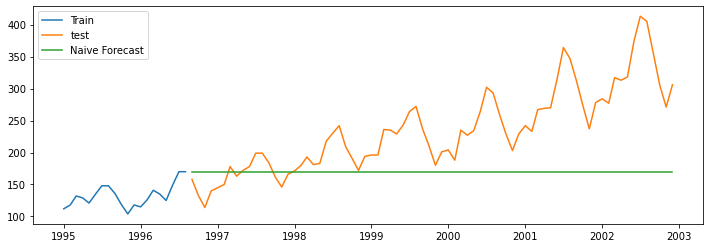

In [31]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.show()


In [ ]:
## Analysis
All the values are same as we assigned all the forecasting records to the last value of the train set
The forecasting is undervalued when compared to the actual test data value.

### Simple average method
Forecast = Average of all past months’ data

Average of all the train data values assigned to the test data.

In [33]:
y_hat_avg = test.copy()

In [34]:
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

In [35]:
y_hat_avg.head()

,Passengers,avg_forecast
Month,,
1996-09-01,158,132.55
1996-10-01,133,132.55
1996-11-01,114,132.55
1996-12-01,140,132.55
1997-01-01,145,132.55


### Plotting train, test and forecast

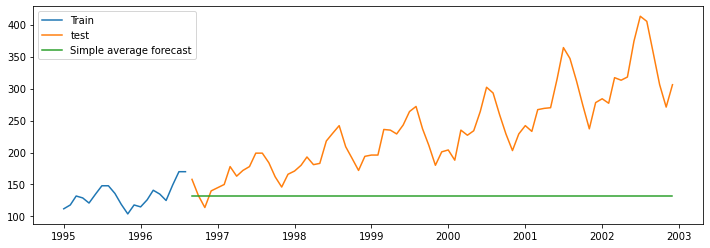

In [36]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.show()


## Calculate RMSE and MAPE Error

In [37]:
from sklearn.metrics import mean_squared_error


### Error for Naive method


### RMSE


In [38]:
# mean_squared_error is a sqaured term of the error
# In order to make the error comparable with the target variable, we have to take the square root of the error (RMSE)
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
rmse


     

91.81

### MAPE (Mean absolute percentage error)

In [39]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_naive['naive_forecast'])/test['Passengers'])*100),2)
mape


26.42

In [40]:
results = pd.DataFrame({'Method':['Naive method'], 'RMSE':[rmse], 'MAPE':[mape]})
results


,Method,RMSE,MAPE
0,Naive method,91.81,26.42


#### MAPE is the percentage of error.

### So, we can see that we are 74% accurate to forecast. (100-26.42=74)